In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os

In [2]:
# Pull Crime Data file
file_to_load = "City Data/2010-2019_Crime.csv"

# Read Crime Data File
crime_df = pd.read_csv(file_to_load)
# crime_df

In [3]:
# Pull Community file
comm_file = "City Data/Chicago_Communities.csv"

# Read Chicago Community File 
comm_df = pd.read_csv(comm_file)
comm_df
# # Rename Columns with spaces
comm_df.rename(columns={'City Area': 'City_Area'}, inplace =True)
comm_df

,Community #,City_Area,Community,Neighborhood
0,8,Central,Near North Side,Cabrini-Green
1,8,Central,Near North Side,The Gold Coast
2,8,Central,Near North Side,Goose Island
3,8,Central,Near North Side,Magnificent Mile
4,8,Central,Near North Side,Old Town
...,...,...,...,...
184,74,Far Southwest Side,Mount Greenwood,Mount Greenwood Heights
185,74,Far Southwest Side,Mount Greenwood,Talley's Corner
186,75,Far Southwest Side,Morgan Park,Beverly Woods
187,75,Far Southwest Side,Morgan Park,Kennedy Park


In [4]:
# Calculate Total Crimes between 2010-2019

grand_total = crime_df["Crimes"].sum()
violent_crimes = crime_df["Violent"].sum()
gun_crimes = crime_df["Gun_Violence"].sum()
robbery_crimes = crime_df["Robbery"].sum()
vandalism_crimes = crime_df["Vandalism"].sum()
fraud_crimes = crime_df["Fraud"].sum()
drug_crimes = crime_df["Drug_Abuse"].sum()
sex_crimes = crime_df["Sexual"].sum()

# Create dictionary to build a DataFrame
crime_count_data = {'Total Reported Crimes': [grand_total],
                    'Total Violent Crimes':[violent_crimes],
                    'Total Gun Violence Crimes': [gun_crimes],
                    'Total Robbery Crimes': [robbery_crimes],
                    'Total Vandalism Crimes':[vandalism_crimes],
                    'Total Fraudulent Crimes' : [fraud_crimes],
                    'Total Drug Crimes': [drug_crimes],
                    'Total Sex Crimes': [sex_crimes]}

decade_crimes_df = pd.DataFrame(crime_count_data)

# Export DataFrame to CSV
decade_crimes_df.to_csv('City Data/decade_crime_count.csv')

decade_crimes_df

# The crime types listed below account for more that 55% of Chicago crimes.  
# Other crimes include non-violent theft, burglary, criminal trespassing, liquor violations, gambling, etc.

,Total Reported Crimes,Total Violent Crimes,Total Gun Violence Crimes,Total Robbery Crimes,Total Vandalism Crimes,Total Fraudulent Crimes,Total Drug Crimes,Total Sex Crimes
0,2966918,727505,93501,114512,300925,113292,256968,36657


In [5]:
# Create DataFrame to calculate annual crimes per year
crime_type_df = crime_df.filter(['Year',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# GroupBy Year
group_year = crime_type_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(group_year["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(group_year["Gun_Violence"].sum())
gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(group_year["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(group_year["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(group_year["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(group_year["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(group_year["Sexual"].sum())
# sexual_crimes

In [6]:
# Merge Crime Calculations
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, robbery_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, vandalism_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, fraud_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, drug_crimes, on='Year')
merge_table5

crime_type_totals = pd.merge(merge_table5, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
# crime_type_totals

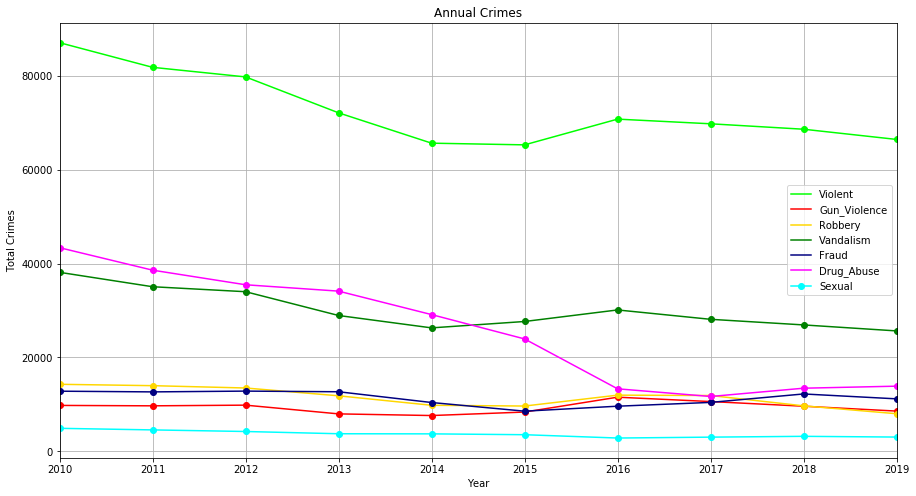

In [7]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('Pictures/grand_total_annual_crimes.png')

plt.show()

In [8]:
# INPUT community name to create a modified line graph of annual community crimes
community = input("What part of Chicago do you want to look into? ")

What part of Chicago do you want to look into?  Austin


In [9]:
# Create a variable for city Areas and Neighborhoods
area = comm_df.loc[comm_df["Community"] == community]['City_Area']
# type(area)
area = area.values
area = area[0]
# area type was originally a series so ".values" was used to pull an individual value from that series

neighborhoods = comm_df.loc[comm_df["Community"]== community]['Neighborhood']
neighborhoods = neighborhoods.values
# Print neighborhoods without brackets and separated by commas
neighborhoods = (', '.join(neighborhoods))

# Provide the city area and list of neighborhoods in the input community
print(f"{community} is in the {area} area, which includes the following neighborhoods: {neighborhoods}")

Austin is in the West Side area, which includes the following neighborhoods: Galewood, The Island


In [10]:
# Create DataFrame to calculate annual crimes for input Community 
comm_crime_df = crime_df.filter(['Year',
                                 'Community',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# Use ".loc" to create a DataFrame adjusted based on the INPUT community
input_df = comm_crime_df.loc[comm_crime_df["Community"]== community]
input_df

# GroupBy Year
year_group = input_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# # Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# sexual_crimes

In [11]:
# Merge Crime Calculation DataFrames
m_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
m_table1

m_table2 = pd.merge(m_table1, robbery_crimes, on='Year')
m_table2

m_table3 = pd.merge(m_table2, vandalism_crimes, on='Year')
m_table3

m_table4 = pd.merge(m_table3, fraud_crimes, on='Year')
m_table4

m_table5 = pd.merge(m_table4, drug_crimes, on='Year')
m_table5

# Final Community DataFrame
comm_crime_totals = pd.merge(m_table5, sexual_crimes, on='Year')
comm_crime_totals = comm_crime_totals.reset_index()
# comm_crime_totals

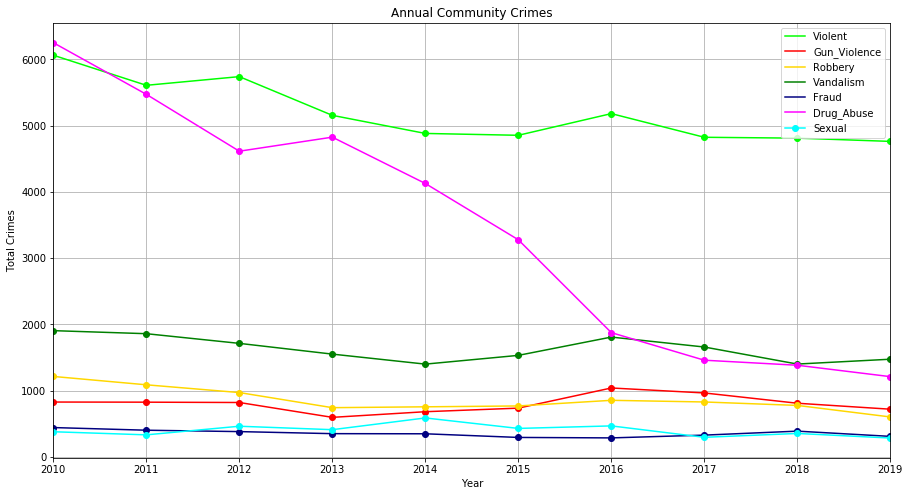

In [12]:
# Graph Crime Totals

ax = plt.gca()

comm_crime_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Community Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('Pictures/annual_community_crimes.png')

plt.show()

In [13]:
# Annual Gun Violence: 
# Top 9 communities with over 3,400 Gun Violence Crimes between 2010-2019

# Filter Master DataFrame by Top 9 Communities
gun_violence_df = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]
# gun_violence_df

# Filter Relevant Columns
gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
# gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Pivot Table to reformat the DataFrame
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

# Rename Columns with spaces
gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
# gun_violence_df


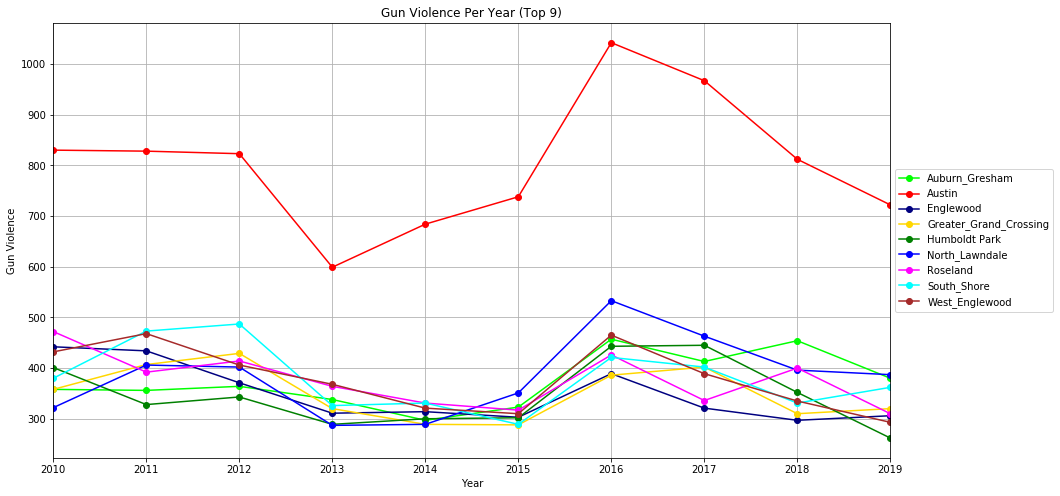

In [14]:
# Build Gun Violence Line Graph

# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")

# Legend Names & Relocate outside of graph
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('Pictures/annual_gun_violence.png')

plt.show()

In [15]:
# Violent Crimes vs # of Arrests

# Build DataFrame
arrest_df = crime_df.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that are >1 under the 'Violent' column
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Merge Violent_Crimes and Arrests DataFrames
arrest_pcnt = pd.merge(violent_crimes, arrests, on = 'Year')
arrest_pcnt ['Arrest_Pcnt'] = round((arrest_pcnt['Arrests']/arrest_pcnt['Violent'])*100,0)
arrest_pcnt['No_Arrests_Pcnt'] = round(((arrest_pcnt['Violent'] - arrest_pcnt['Arrests'])/arrest_pcnt['Violent'])*100,0) 
arrest_pcnt = arrest_pcnt.reset_index()
arrest_pcnt.to_csv('arrest_pcnt.csv')
# arrest_pcnt

In [43]:
# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "Arrests", "No_Arrests"])
# v_crime_arrests

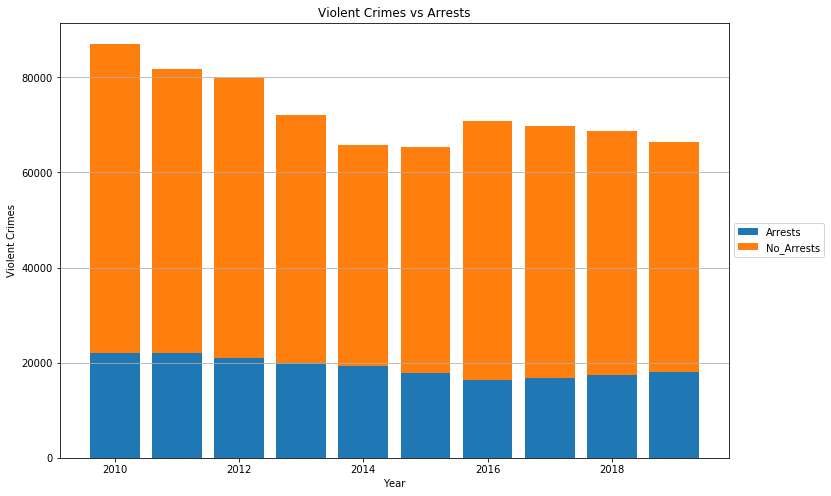

In [44]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")

# Legend Names & Relocate outside of graph
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('Pictures/v_crime_arrests.png')

plt.show()

In [18]:
# Calculate areas with the highest types of crimes

area_crimes_df = crime_df.filter(['Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Weapon',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])
area_crimes_df

# GroupBy Area
area_group = area_crimes_df.groupby(['Area'])

# Calculate Violent Crimes
v_crimes = pd.DataFrame(area_group["Violent"].sum())
v_crimes
# Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(area_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(area_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(area_group["Vandalism"].sum())
# vandalism_crimes
# Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(area_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(area_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sex_crimes = pd.DataFrame(area_group["Sexual"].sum())
# sexual_crimes

# area_crimes_df


In [19]:
# Merge Crime Calculations
table1 = pd.merge(v_crimes, gun_crimes, on='Area')
table1

table2 = pd.merge(table1, robbery_crimes, on='Area')
table2

table3 = pd.merge(table2, vandalism_crimes, on='Area')
table3

table4 = pd.merge(table3, fraud_crimes, on='Area')
table4

table5 = pd.merge(table4, drug_crimes, on='Area')
table5

crimes_per_area = pd.merge(table5, sex_crimes, on='Area')
crimes_per_area= crimes_per_area.reset_index()
crimes_per_area.to_csv('area_crimes.csv')
# crimes_per_area

In [20]:
# Highlight Areas with the Max Amount of Crimes per Type

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [21]:
crimes_per_area.style.apply(highlight_max)

,Area,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,Central,32227,1697,6109,10566,22247,4624,1829
1,Far North Side,54681,4118,7447,27349,13793,14048,2583
2,Far Southeast Side,98273,14909,14294,40577,9305,25881,3739
3,Far Southwest Side,48212,7307,7465,21439,5640,13983,1661
4,North Side,37110,3369,7417,21076,12106,5515,1568
5,Northwest Side,38236,3616,4763,20049,6810,8706,2059
6,Southside,112137,15147,18282,43213,10841,29031,3907
7,Southwest Side,116088,16075,17193,48077,12569,39481,6992
8,West Side,190541,27263,31542,68579,19981,115699,12319


In [22]:
# Filter Community list by West Side and Central Areas

max_crime_locations = comm_df[(comm_df.City_Area == 'West Side')|
                        (comm_df.City_Area == 'Central')]
# max_crime_locations               

In [23]:
per_capita_income="Per_Capita_Income 2008-2012.csv"
edu_data=pd.read_csv(per_capita_income)
edu_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [24]:
crime_2010="2010_data_csv.csv"
crime_data=pd.read_csv(crime_2010)
crime_data_renamed=crime_data.rename(columns={"Community Area": "Community Area Number"})
crime_data_renamed.head()


,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,Year
0,1/1/10,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,931,9,15.0,61.0,17,2010
1,1/1/10,266,CRIM SEXUAL ASSAULT,PREDATORY,OTHER,True,False,2011,20,40.0,2.0,2,2010
2,1/1/10,265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,APARTMENT,False,True,2413,24,50.0,2.0,2,2010
3,1/1/10,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,931,9,15.0,61.0,17,2010
4,1/1/10,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,813,8,13.0,65.0,17,2010


In [25]:
crime_data_renamed["Primary Type"].value_counts()

THEFT                               76797
BATTERY                             65403
NARCOTICS                           43393
CRIMINAL DAMAGE                     40659
BURGLARY                            26426
OTHER OFFENSE                       22020
ASSAULT                             21536
MOTOR VEHICLE THEFT                 19029
ROBBERY                             14274
DECEPTIVE PRACTICE                  12546
CRIMINAL TRESPASS                    9401
WEAPONS VIOLATION                    3704
PUBLIC PEACE VIOLATION               3538
OFFENSE INVOLVING CHILDREN           2600
PROSTITUTION                         2485
CRIM SEXUAL ASSAULT                  1381
SEX OFFENSE                          1133
GAMBLING                              927
INTERFERENCE WITH PUBLIC OFFICER      797
LIQUOR LAW VIOLATION                  736
ARSON                                 522
HOMICIDE                              438
KIDNAPPING                            313
INTIMIDATION                      

In [26]:
# crime_data2=crime_data[["Primary Type", "Arrest","Community Area"]]
# crime_data2.head()


In [27]:
# combine datasets
merge_data = pd.merge(crime_data_renamed, edu_data, on="Community Area Number")
merge_data.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,Year,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1/1/10,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,931,9,15.0,...,17,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
1,1/1/10,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,931,9,15.0,...,17,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,1/1/10,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,915,9,16.0,...,14,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
3,1/1/10,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,935,9,3.0,...,2,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
4,1/1/10,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,932,9,16.0,...,2,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0


In [28]:
list(merge_data.columns.values)

['Date',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area Number',
 'FBI Code',
 'Year',
 'COMMUNITY AREA NAME',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

In [29]:
merge_data["COMMUNITY AREA NAME"].value_counts()

Austin             24308
South Shore        12328
Humboldt park      11837
Near North Side    11601
West Town          11364
                   ...  
Hegewisch            767
Forest Glen          695
Burnside             460
Edison Park          305
CHICAGO              186
Name: COMMUNITY AREA NAME, Length: 78, dtype: int64

In [30]:
#homicides_df = merge_data.loc[(merge_data["Primary Type"] == "HOMICIDE" )| (merge_data["Primary Type"] == "Theft"), :]
#homicides_df
#only_billy_and_peter = df.loc[(df["first_name"] == "Billy") | (
 #   df["first_name"] == "Peter"), :]
merge_filter_by_commun=merge_data.loc[(merge_data["COMMUNITY AREA NAME"]=="Loop") | 
                       (merge_data["COMMUNITY AREA NAME"]=="Rogers Park") | 
                       (merge_data["COMMUNITY AREA NAME"]=="South Chicago")| 
                       (merge_data["COMMUNITY AREA NAME"]=="Morgan Park")|
                       (merge_data["COMMUNITY AREA NAME"]=="Logan Square")|
                       (merge_data["COMMUNITY AREA NAME"]=="Portage Park")|
                       (merge_data["COMMUNITY AREA NAME"]=="Hyde Park")|
                       (merge_data["COMMUNITY AREA NAME"]=="Englewood")|
                       (merge_data["COMMUNITY AREA NAME"]=="Humboldt park")]
                   #    (merge_data["Primary Type"]=="HOMICIDE")]
merge_filter_by_commun.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,Year,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
21343,1/1/10,266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,2424,24,49.0,...,2,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21344,1/1/10,820,THEFT,$500 AND UNDER,STREET,False,False,2424,24,49.0,...,6,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21345,1/1/10,890,THEFT,FROM BUILDING,OTHER,False,False,2431,24,49.0,...,6,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21346,1/1/10,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2432,24,40.0,...,6,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21347,1/1/10,501A,OTHER OFFENSE,ANIMAL ABUSE/NEGLECT,APARTMENT,False,False,2432,24,40.0,...,26,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [31]:
# Filter on homicides and drop unneccesary rows and columns
homicides_df = merge_filter_by_commun.loc[(merge_filter_by_commun["Primary Type"] == "HOMICIDE")]
homicides_df = homicides_df[["Year","Primary Type", "COMMUNITY AREA NAME","PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]]
homicides_df.head()  

#homicides_df[['COMMUNITY AREA NAME','Primary Type']]


,Year,Primary Type,COMMUNITY AREA NAME,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
21520,2010,HOMICIDE,Rogers Park,18.2
23481,2010,HOMICIDE,Rogers Park,18.2
24975,2010,HOMICIDE,Rogers Park,18.2
37488,2010,HOMICIDE,Humboldt park,35.4
38003,2010,HOMICIDE,Humboldt park,35.4


In [32]:
df = pd.DataFrame(homicides_df['COMMUNITY AREA NAME'].value_counts())

In [33]:
df = df.reset_index()

In [34]:
df.columns = ['neighborhood','count']

In [35]:
homicides_df.columns = ['Year', 'Primary Type', 'neighborhood',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']

In [36]:
df = homicides_df.merge(df,how="inner",on='neighborhood')

In [37]:
df = df.groupby('neighborhood')[['count','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']].max()

In [38]:
df

,count,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
neighborhood,,
Englewood,11,28.5
Humboldt park,27,35.4
Hyde Park,1,4.3
Logan Square,2,14.8
Loop,1,3.1
Morgan Park,9,10.8
Portage Park,2,19.3
Rogers Park,3,18.2
South Chicago,15,26.6


In [39]:
#df['count'].plot()
#df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar')
#plt.show()

Text(0, 0.5, 'Number of Homicide')

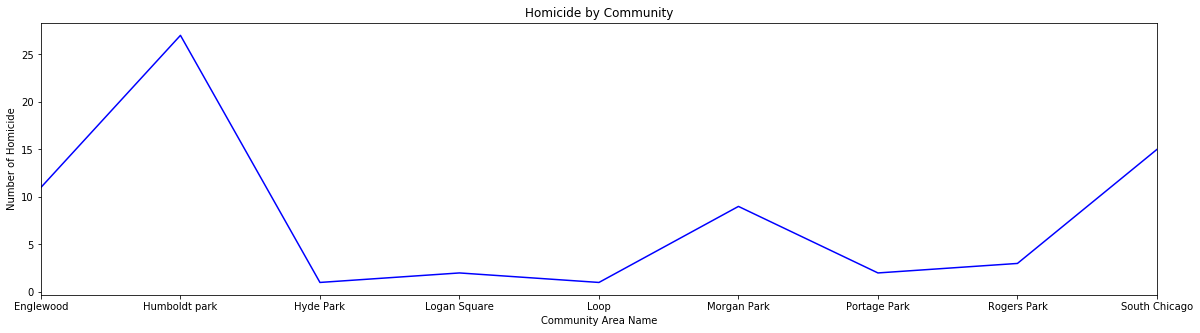

In [40]:
plt.figure(figsize=(20,5))
df['count'].plot(color='b')
plt.title("Homicide by Community")
plt.xlabel('Community Area Name')
plt.ylabel('Number of Homicide')

Text(0, 0.5, '% AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')

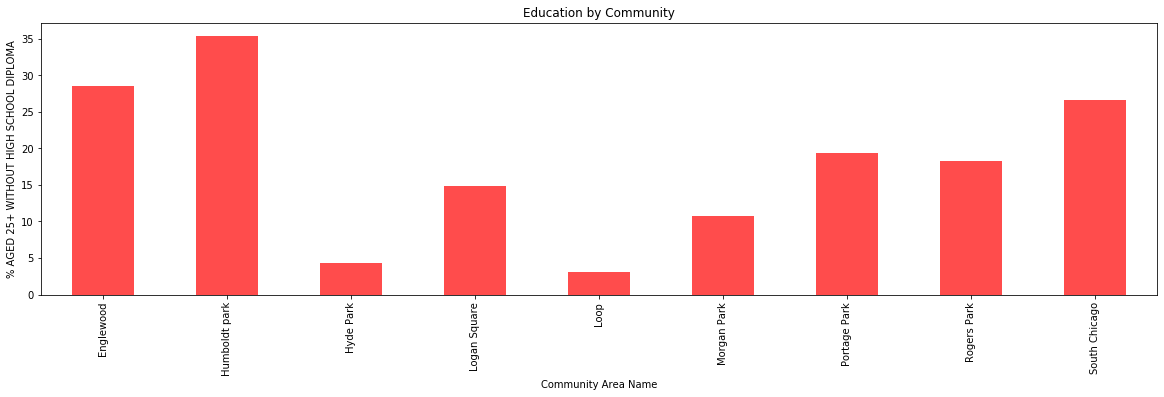

In [41]:
plt.figure(figsize=(20,5))
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar', color='r', alpha=0.7, align="center")

plt.title("Education by Community")
plt.xlabel('Community Area Name')
plt.ylabel('% AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')

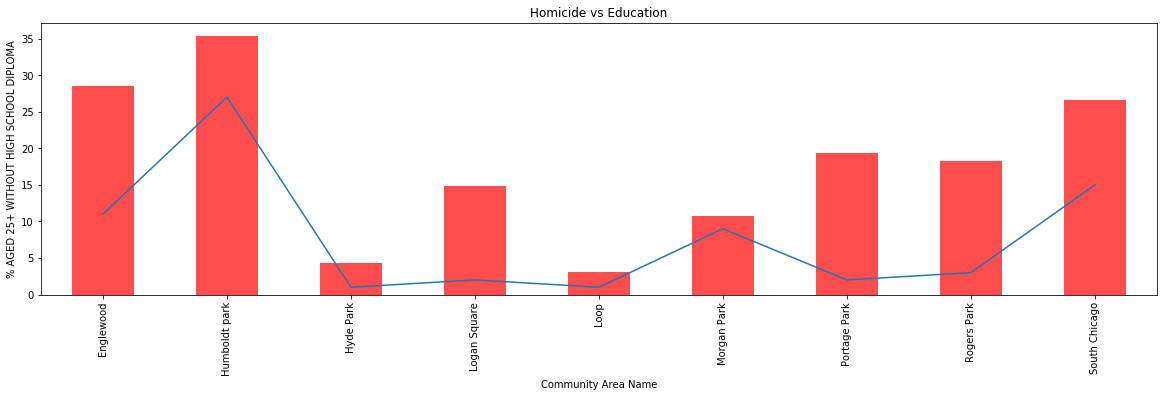

In [42]:
plt.figure(figsize=(20,5))
df['count'].plot()
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar',color='r', alpha=0.7, align="center")
plt.title("Homicide vs Education")
plt.xlabel('Community Area Name')
plt.ylabel('% AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')
plt.show()